In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc


df = pd.read_csv('./output/train.csv')

In [2]:
df.isna().sum(axis=1)
print(len(df))
df = df.dropna(axis=0)
print(len(df))

# no games from 2011 bc they have nans
with pd.option_context('mode.use_inf_as_na', True):
    df = df.fillna(0)

106368
85070


In [3]:
y = df.target
X = df.drop(columns=['target'])


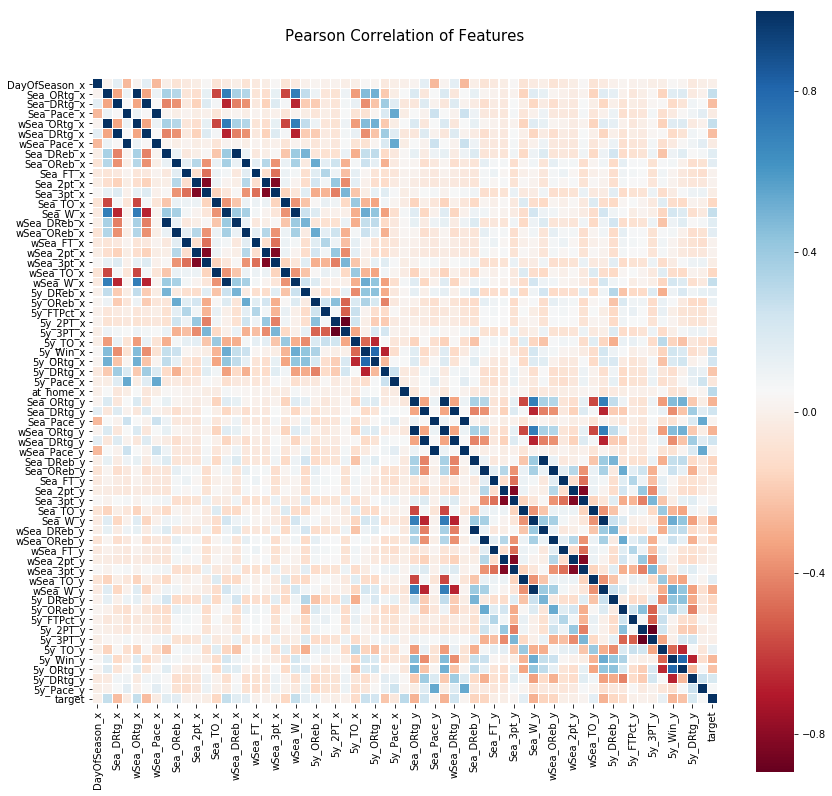

In [4]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)


In [5]:
# serigne's kernel
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [6]:
#Validation function
n_folds = 5

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=17).get_n_splits(X.values)
    mae= -cross_val_score(model, X.values, y, scoring="neg_mean_absolute_error", cv = kf)
    return(mae)

In [7]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9, random_state=3))

In [8]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.12, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [9]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.005, random_state=1))

score = mae_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 9.2803 (0.1058)



In [10]:
score = mae_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 9.2803 (0.1058)



In [11]:
score = mae_cv(model_lgb)
#9.1529
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 9.1529 (0.1047)



In [12]:

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cat = []
# num = [i for i in list(X)]

# X[num] = scaler.fit_transform(X[num])



In [13]:
# import numpy as np
# import pandas as pd
# import sklearn.metrics as mtr
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.callbacks import Callback, EarlyStopping
# from keras.models import Model
# from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, BatchNormalization, GaussianNoise
# from keras.layers.embeddings import Embedding
# from sklearn.model_selection import KFold,GroupKFold
# import warnings
# import random as rn
# import tensorflow as tf
# from keras.models import load_model
# import os